# Capstone Project: Web Scraping Programming Languages Data
## Modesta Uzochukwu

As part of my Data Science Capstone Project with Coursera, I was tasked with scraping data from the internet and analyzing it.
The dataset included the following key features:

**◾Programming Languages**

**◾Average Salary**

**◾Learning Difficulty**

## Tools and Technologies Used

**Python 🐍** → Core programming language

**BeautifulSoup** → For web scraping the data

**Pandas** → For cleaning, organizing, and saving data

**Matplotlib / Seaborn** → For visualization

**Jupyter Notebook** → For analysis and documentation

Pandas and Matplotlib were the most used tools throughout the project, especially for cleaning and visualization.

In [21]:
#this url contains the data i would scrape
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

## Data Collection

The data was scraped from a reliable online source using *requests* and *BeautifulSoup*.

In [22]:
from bs4 import BeautifulSoup
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"
data = requests.get(url).text

# Use built-in parser
soup = BeautifulSoup(data, "html.parser")

# just to check: print the first 200 characters of the soup
print(soup.prettify()[:200])


<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Salary survey results of programming languages
  </title>
  <style>
   table, th, td {
  border: 1px solid black;
}
  </style>
 </head>
 <body>
  


In [23]:
# find the table
table = soup.find("table")

# get all rows (tr tags)
rows = table.find_all("tr")

# Just peek at the first 2 rows to see structure
for row in rows[:2]:
    cols = row.find_all(["th", "td"])
    print([col.get_text(strip=True) for col in cols])


['No.', 'Language', 'Created By', 'Average Annual Salary', 'Learning Difficulty']
['1', 'Python', 'Guido van Rossum', '$114,383', 'Easy']


In [24]:
import pandas as pd

# extract all rows into a list
table = soup.find("table")
rows = table.find_all("tr")

data = []
for row in rows:
    cols = row.find_all(["th", "td"])
    cols = [col.get_text(strip=True) for col in cols]
    data.append(cols)

# Step 5: first row is the header
headers = data[0]
rows_data = data[1:]

# Step 6: put into pandas DataFrame
df = pd.DataFrame(rows_data, columns=headers)

# Peek at first 5 rows
print(df.head())


  No.    Language                    Created By Average Annual Salary  \
0   1      Python              Guido van Rossum              $114,383   
1   2        Java                 James Gosling              $101,013   
2   3           R  Robert Gentleman, Ross Ihaka               $92,037   
3   4  Javascript                      Netscape              $110,981   
4   5       Swift                         Apple              $130,801   

  Learning Difficulty  
0                Easy  
1                Easy  
2                Hard  
3                Easy  
4                Easy  


In [25]:
df.style.set_table_attributes("style='display:inline'").set_caption("Programming Languages Table")

,No.,Language,Created By,Average Annual Salary,Learning Difficulty
0,1,Python,Guido van Rossum,"$114,383",Easy
1,2,Java,James Gosling,"$101,013",Easy
2,3,R,"Robert Gentleman, Ross Ihaka","$92,037",Hard
3,4,Javascript,Netscape,"$110,981",Easy
4,5,Swift,Apple,"$130,801",Easy
5,6,C++,Bjarne Stroustrup,"$113,865",Hard
6,7,C#,Microsoft,"$88,726",Hard
7,8,PHP,Rasmus Lerdorf,"$84,727",Easy
8,9,SQL,"Donald D. Chamberlin, Raymond F. Boyce.","$84,793",Easy
9,10,Go,"Robert Griesemer, Ken Thompson, Rob Pike.","$94,082",Difficult


In [27]:
# Save the scraped programming languages table to a CSV file
# 'index=False' makes sure the row numbers are not added as an extra column
df.to_csv("popular_programming_languages.csv", index=False)

## Data Wrangling

In [14]:
# Clean the 'Average Annual Salary' column:
# 1. I will remove the '$' symbol because it is not numeric.
# 2. Also, i will remove commas so numbers can be converted to integers.
# 3. Finally, i will convert the column to integer type for numerical analysis and visualization.

df["Average Annual Salary"] = (
    df["Average Annual Salary"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(int)
)

df.head()

,No.,Language,Created By,Average Annual Salary,Learning Difficulty
0,1,Python,Guido van Rossum,114383,Easy
1,2,Java,James Gosling,101013,Easy
2,3,R,"Robert Gentleman, Ross Ihaka",92037,Hard
3,4,Javascript,Netscape,110981,Easy
4,5,Swift,Apple,130801,Easy


## Data Visualization

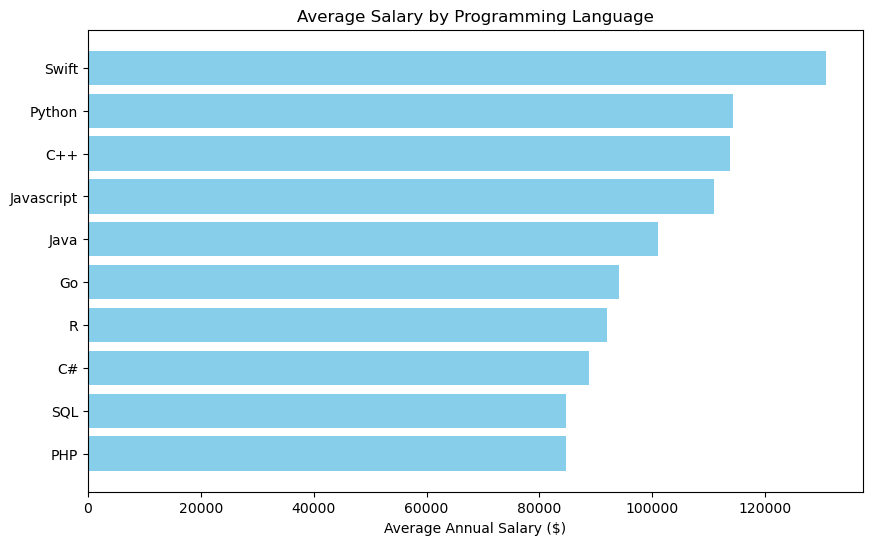

In [15]:
import matplotlib.pyplot as plt

# Sort by salary
df_sorted = df.sort_values("Average Annual Salary", ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(df_sorted["Language"], df_sorted["Average Annual Salary"], color="skyblue")
plt.xlabel("Average Annual Salary ($)")
plt.title("Average Salary by Programming Language")
plt.show()

## Findings

**Insight**: While specialized languages like Swift command the highest salaries, general-purpose languages like Python and JavaScript also offer competitive pay, making them attractive choices for learners and professionals.

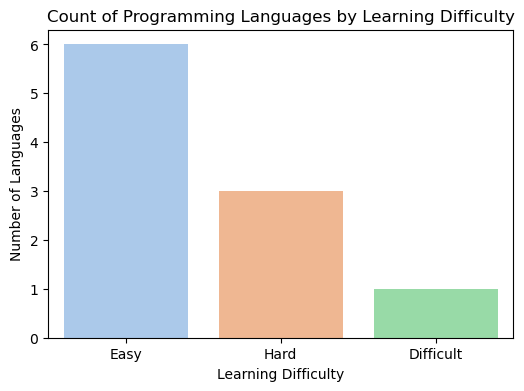

,Learning Difficulty,Languages
0,Difficult,Go
1,Easy,"Python, Java, Javascript, Swift, PHP, SQL"
2,Hard,"R, C++, C#"


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of languages by difficulty (for the bar chart)
difficulty_counts = df["Learning Difficulty"].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=difficulty_counts.index, y=difficulty_counts.values, palette="pastel")
plt.title("Count of Programming Languages by Learning Difficulty")
plt.ylabel("Number of Languages")
plt.xlabel("Learning Difficulty")
plt.show()

# Show table of which languages belong to each difficulty
difficulty_groups = df.groupby("Learning Difficulty")["Language"].apply(lambda x: ', '.join(x))
difficulty_groups = difficulty_groups.reset_index()
difficulty_groups.columns = ["Learning Difficulty", "Languages"]

display(difficulty_groups)

## Findings

**Insight**: Most high-paying languages (Python, Swift, JavaScript) are easy to learn, making them accessible for beginners while still being financially rewarding. In contrast, harder-to-learn languages (C++, R, C#) don’t always guarantee higher salaries.

## Conclusion


This project demonstrates my web scraping, data cleaning, and visualization skills by extracting programming languages data from a web page, processing it, and generating actionable insights.

By combining Python, BeautifulSoup, Pandas, and Matplotlib/Seaborn, I was able to clean, analyze, and visualize the dataset, highlighting both salary trends and learning difficulty levels for each programming language.

Overall, this capstone project showcases my ability to conduct structured research, handle real-world datasets, and communicate findings effectively, demonstrating key skills for data-driven decision-making.